In [37]:
import pandas as pd 
import os, glob

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
sample_physio_path = ('/Users/67981492/Desktop/loki_1/data/physio/scitran/coax/LOKI1/813/ses-02/func-bold_task-lokicat_run-01_PhysioLog')

In [5]:
phys_files = os.listdir(sample_physio_path)

In [49]:
phys_files

['Physio_20191015_115013_ad74be9f-c9b2-4b55-8e6f-ff8697c7e4d0_RESP.log',
 'Physio_20191015_115013_ad74be9f-c9b2-4b55-8e6f-ff8697c7e4d0_ECG.log',
 'Physio_20191015_115013_ad74be9f-c9b2-4b55-8e6f-ff8697c7e4d0_PULS.log',
 'Physio_20191015_115013_ad74be9f-c9b2-4b55-8e6f-ff8697c7e4d0_Info.log']

In [70]:
resp_file = glob.glob(os.path.join(sample_physio_path,'*RESP*'))[0]
pulse_file = glob.glob(os.path.join(sample_physio_path,'*PULS*'))[0]
ecg_file = glob.glob(os.path.join(sample_physio_path,'*ECG*'))[0]
vol_slice_file = glob.glob(os.path.join(sample_physio_path,'*Info*'))[0]

In [74]:
vol_slice_file

'/Users/67981492/Desktop/loki_1/data/physio/scitran/coax/LOKI1/813/ses-02/func-bold_task-lokicat_run-01_PhysioLog/Physio_20191015_115013_ad74be9f-c9b2-4b55-8e6f-ff8697c7e4d0_Info.log'

In [89]:
resp_df = pd.read_csv(resp_file, skiprows=5, delim_whitespace=True)
pulse_df = pd.read_csv(pulse_file, skiprows=5, delim_whitespace=True)
ecg_df = pd.read_csv(ecg_file, skiprows=5, delim_whitespace=True)
vol_slice_df = pd.read_csv(vol_slice_file, skiprows=7, 
                           delim_whitespace=True, skipfooter=2, engine='python')

In [55]:
resp_df.head()

,ACQ_TIME_TICS,CHANNEL,VALUE,SIGNAL
0,17046102,RESP,1787,NaN
1,17046110,RESP,1787,NaN
2,17046118,RESP,1787,NaN
3,17046126,RESP,1772,NaN
4,17046134,RESP,1772,NaN


In [56]:
pulse_df.head()

,ACQ_TIME_TICS,CHANNEL,VALUE,SIGNAL
0,17046102,PULS,1469,NaN
1,17046104,PULS,1460,NaN
2,17046106,PULS,1454,NaN
3,17046108,PULS,1442,NaN
4,17046110,PULS,1436,NaN


In [57]:
ecg_df.head()

,ACQ_TIME_TICS,CHANNEL,VALUE,SIGNAL
0,17046102,ECG1,2385,NaN
1,17046103,ECG1,2391,NaN
2,17046104,ECG1,2394,NaN
3,17046105,ECG1,2393,NaN
4,17046106,ECG1,2388,NaN


In [90]:
vol_slice_df.head()

,VOLUME,SLICE,ACQ_START_TICS,ACQ_FINISH_TICS,ECHO
0,0,0,17048831,17048854,0
1,0,8,17048831,17048854,0
2,0,16,17048831,17048854,0
3,0,24,17048831,17048854,0
4,0,3,17048868,17048890,0


# Signal distributions

Text(0.5, 1.0, 'respiration')

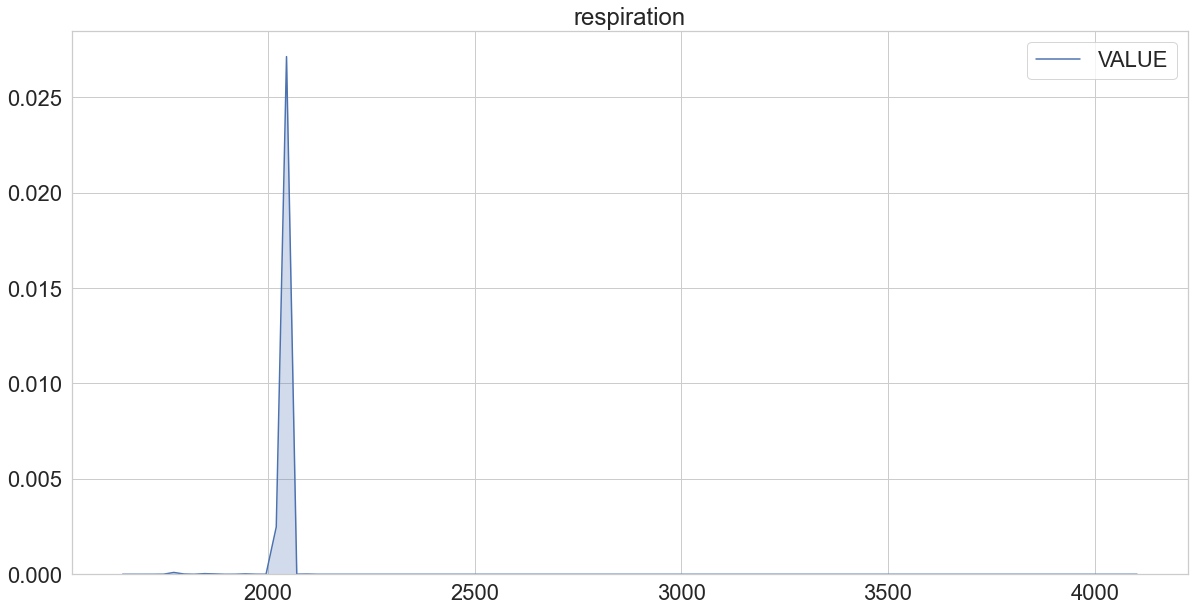

In [64]:
sns.kdeplot(resp_df.VALUE, shade=True)
plt.title('respiration')

Text(0.5, 1.0, 'pulse')

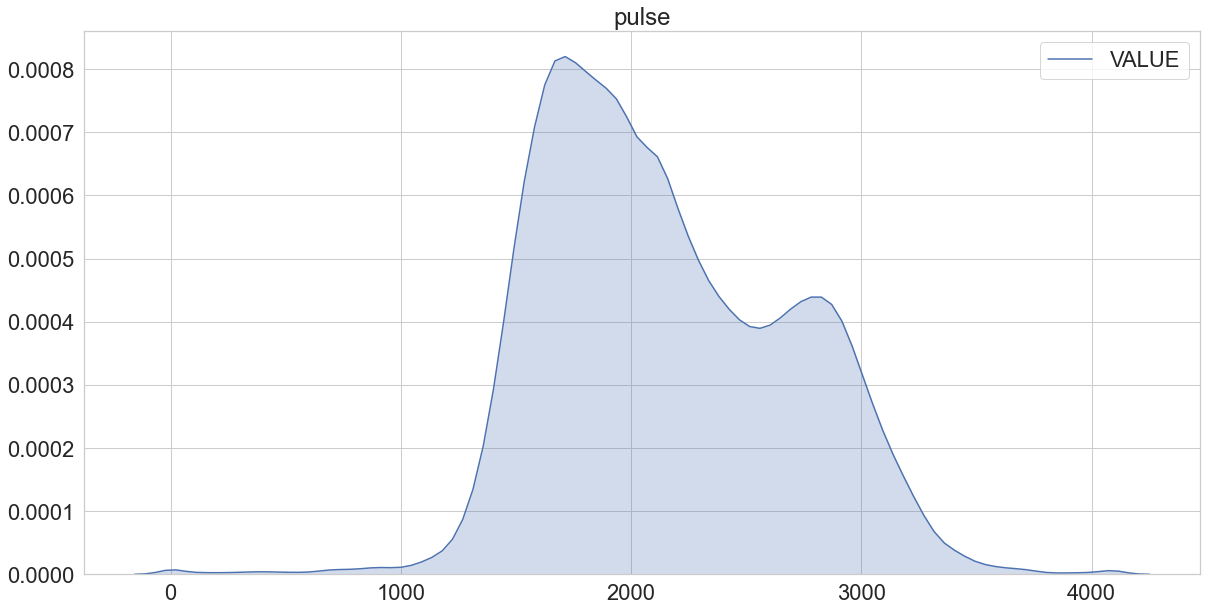

In [63]:
sns.kdeplot(pulse_df.VALUE, shade=True)
plt.title('pulse')

Text(0.5, 1.0, 'ecg')

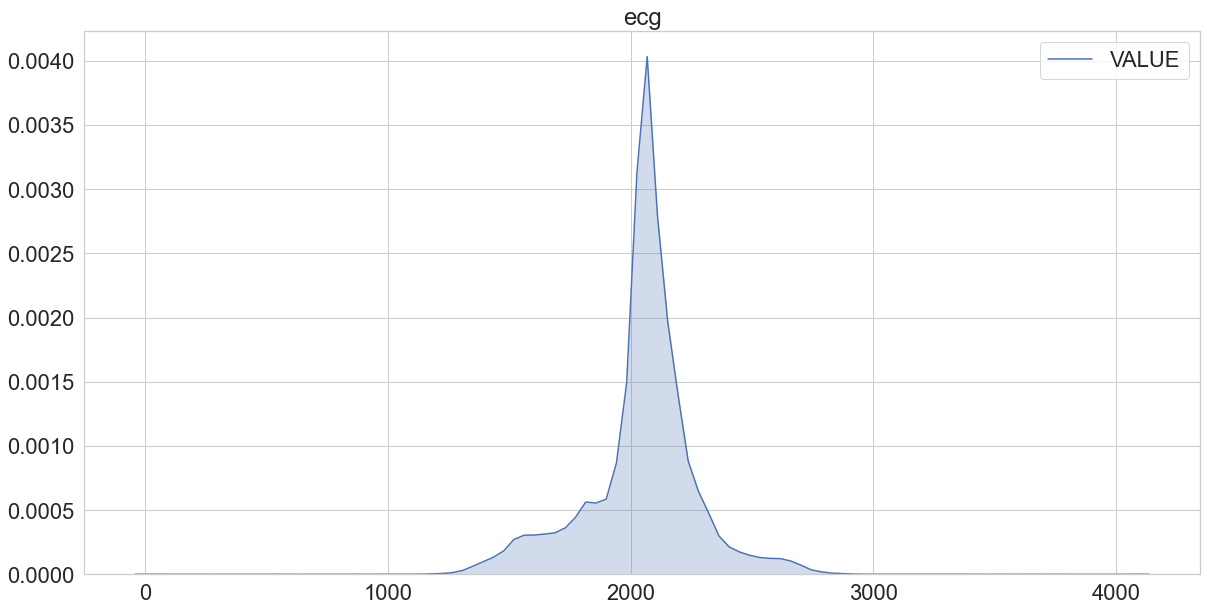

In [62]:
sns.kdeplot(ecg_df.VALUE, shade=True)
plt.title('ecg')

# Alternate signal flags for each signal

In [67]:
resp_df.SIGNAL.unique()

array([nan, 'PULS_TRIGGER', 'ECG_TRIGGER'], dtype=object)

In [65]:
pulse_df.SIGNAL.unique()

array([nan, 'ECG_TRIGGER', 'PULS_TRIGGER'], dtype=object)

In [66]:
ecg_df.SIGNAL.unique()

array([nan, 'PULS_TRIGGER', 'ECG_TRIGGER'], dtype=object)

# A sample of signal time series

Text(0, 0.5, 'respiration (a.u.)')

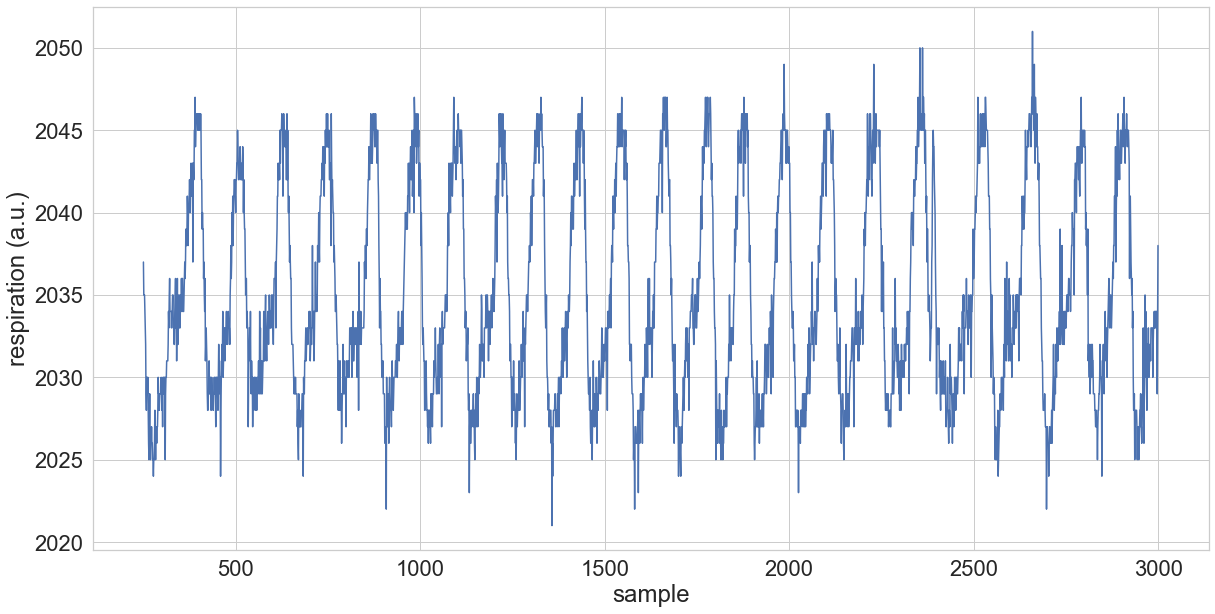

In [48]:
sns.set(font_scale=2, style='whitegrid')  

plt.plot(resp_df.VALUE[250:3000])
plt.xlabel('sample')
plt.ylabel('respiration (a.u.)')

Text(0, 0.5, 'pulse (a.u.)')

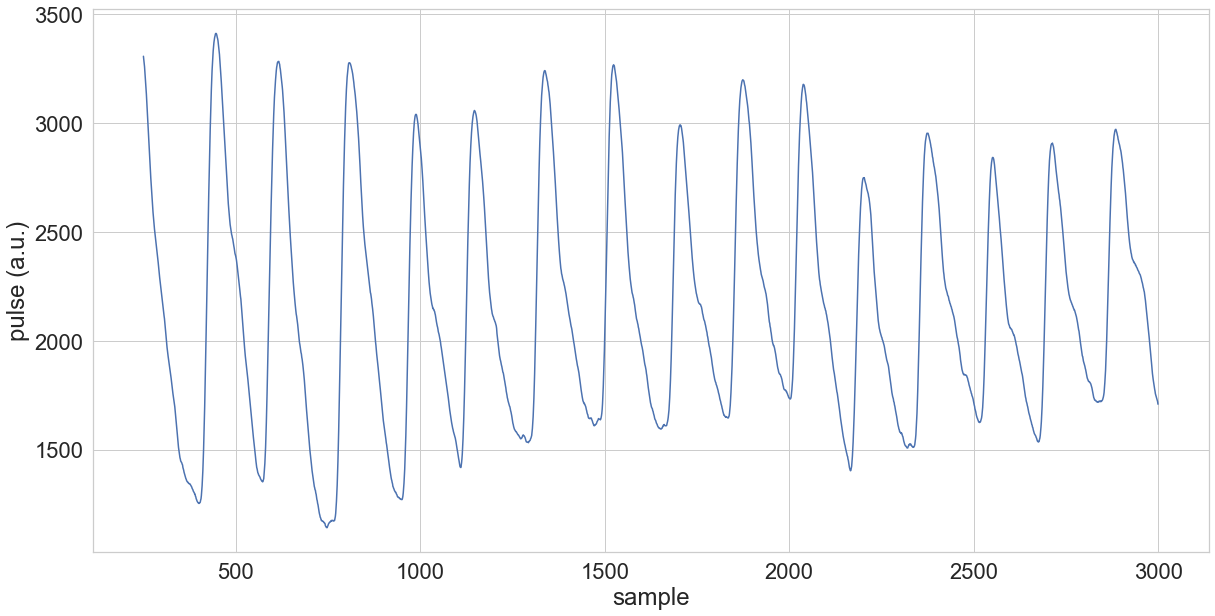

In [58]:
sns.set(font_scale=2, style='whitegrid')  

plt.plot(pulse_df.VALUE[250:3000])
plt.xlabel('sample')
plt.ylabel('pulse (a.u.)')

Text(0, 0.5, 'ecg (a.u.)')

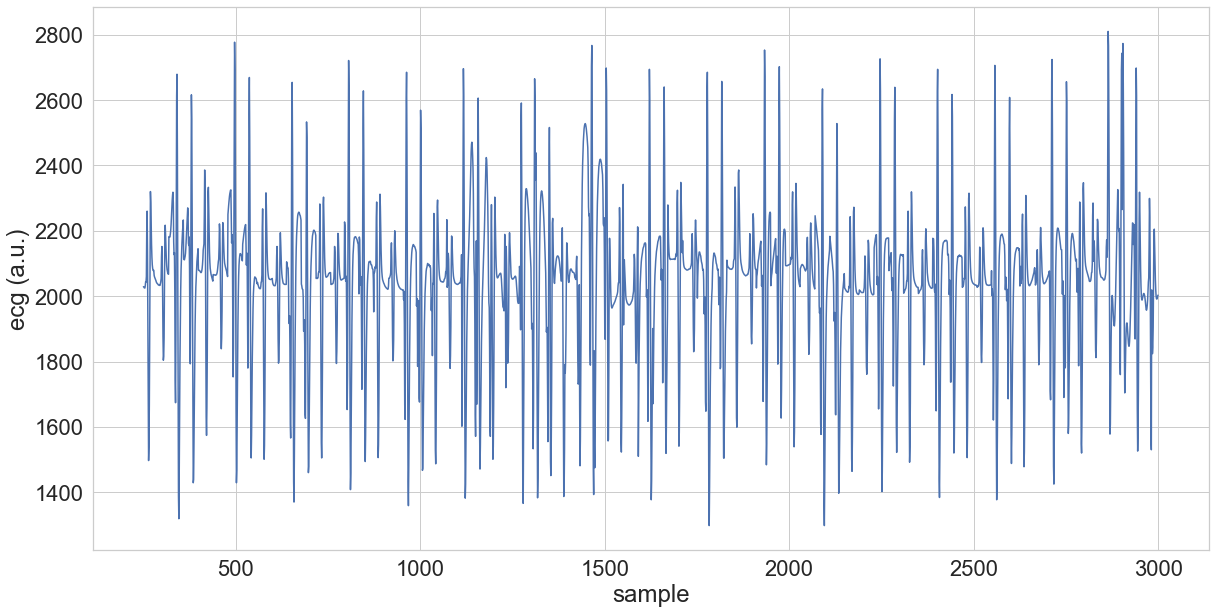

In [59]:
sns.set(font_scale=2, style='whitegrid')  

plt.plot(ecg_df.VALUE[250:3000])
plt.xlabel('sample')
plt.ylabel('ecg (a.u.)')